In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 6.10

Consider the equation $x = 1 - e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of **contact processes**, mathematical models of **epidemics**, and the **theory of random graphs**.

---

a) Write a program to solve this equation for $x$ using the **relaxation method** for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$.

b) Modify your program to calculate the solution for values of $c$ from $0$ to $3$ in steps of $0.01$ and make a plot of $x$ as a function of $c$. You should see a clear transition from a regime in which $x = 0$ to a regime of nonzero $x$. This is another example of a **phase transition**. In physics this transition is known as the **percolation transition**; in epidemiology it is the **epidemic threshold**.

In [41]:
# given equation
def fxn(x,c):
    return 1-np.exp(-c*x)
#program for a
def relax(fxn, x, c, tol):
    resultarr = []
    xtemp = x
    for i in c:
        x = xtemp
        while np.abs(x-fxn(x,i)) > tol:
            #print(x-fxn(x,i))
            x = fxn(x,i)
        resultarr.append(x)
    return resultarr

In [42]:
# test of fxn at different x vals with c=2
fxn(np.array([0,1,2,3]),2)

array([0.        , 0.86466472, 0.98168436, 0.99752125])

In [43]:
# relaxation calculation for c=2 case
relax(fxn,1,[2],1e-6)

[np.float64(0.7968133630966887)]

In [44]:
# relaxation calculation for multiple c's
relax(fxn,1,[1,2,3],1e-6)

[np.float64(0.001414210805612881),
 np.float64(0.7968133630966887),
 np.float64(0.9404801006527044)]

In [50]:
# an array of c's from 0.01 - 3 in steps of 0.01
carr = np.linspace(0,3,301)

In [51]:
print(carr)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

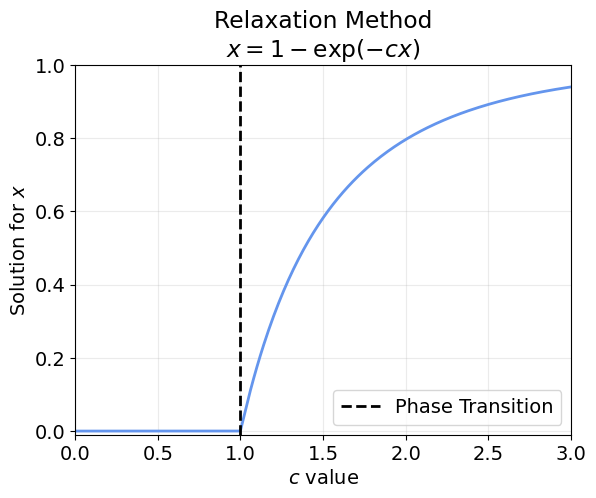

In [73]:
plt.rcParams.update({'font.size': 14})
plt.plot(carr,relax(fxn,1,carr,1e-6),linewidth=2,color="cornflowerblue")
plt.axvline(1,color='k',linewidth=2,linestyle='--', label="Phase Transition")


plt.title("Relaxation Method\n$x=1-\exp(-cx)$")
plt.legend()
plt.ylabel("Solution for $x$")
plt.xlabel("$c$ value")

plt.ylim(-0.01,1)
plt.xlim(0,3)
plt.grid(which='both',alpha=0.25)
plt.savefig("Relaxation_method.png", dpi=300, bbox_inches='tight')
plt.show()


## Exercise 6.11: Overrelaxation

If you did not already do Exercise 6.10, you should do it before this one.

The ordinary **relaxation method** involves iterating the equation $x' = f(x)$, starting from an initial guess, until it converges. As we have seen, this is often a fast and easy way to find solutions to nonlinear equations. However, it is possible in some cases to make the method work even faster using the technique of **overrelaxation**.

Suppose our initial guess at the solution of a particular equation is, say, $x = 1$, and the final, true solution is $x = 5$. After the first step of the iterative process, we might then see a value of, say, $x = 3$. In the overrelaxation method, we observe this value and note that $x$ is increasing, then we deliberately overshoot the calculated value, in the hope that this will get us closer to the final solution—in this case we might pass over $x = 5$ and go straight to a value of $x = 7$, perhaps, which is closer to the final solution of $x = 5$ and hence should get us to that solution quicker. The overrelaxation method provides a formula for performing this kind of overshooting in a controlled fashion and often, though not always, it does get us to our solution faster.

In detail, it works as follows. We can rewrite the equation $x' = f(x)$ in the form $x' = x + \Delta x$, where
$$\Delta x = x' - x = f(x) - x$$

The overrelaxation method involves iteration of the modified equation
$$x' = x + (1 + \omega)\Delta x$$
(keeping the definition of $\Delta x$ the same). If the parameter $\omega$ is zero, then this is the same as the ordinary relaxation method, but for $\omega > 0$ the method takes the amount $\Delta x$ by which the value of $x$ would have been changed and changes it by a little more. Using $\Delta x = f(x) - x$, we can also write $x'$ as
$$x' = x + (1 + \omega)[f(x) - x] = (1 + \omega)f(x) - \omega x$$
which is the form in which it is usually written.

For the method to work the value of $\omega$ must be chosen correctly, although there is some wiggle room—there is an optimal value, but other values close to it will typically also give good results. Unfortunately, there is no general theory that tells us what the optimal value is. Usually it is found by **trial and error**.

a) Derive an equivalent of Eq. (6.81) for the overrelaxation method and hence show that the error on $x'$, the equivalent of Eq. (6.83), is given by
$$\epsilon' \approx - \frac{1 - [1/(1 + \omega)] f'(x) - \omega}{f'(x) - 1} \epsilon$$

---

b) Consider again the equation $x = 1 - e^{-cx}$ that we solved in Exercise 6.10. Take the program you wrote for part (a) of that exercise, which solved the equation for the case $c = 2$, and modify it to print out the number of iterations it takes to converge to a solution accurate to $10^{-6}$.

c) Now write a new program (or modify the previous one) to solve the same equation $x = 1 - e^{-cx}$ for $c = 2$, again to an accuracy of $10^{-6}$, but this time using **overrelaxation**. Have your program print out the answers it finds along with the number of iterations it took to find them. Experiment with different values of $\omega$ to see how fast you can get the method to converge. A value of $\omega \approx 0.6$ is a reasonable starting point. With some trial and error you should be able to get the calculation to converge about twice as fast as the simple relaxation method, i.e., in about half as many iterations.

d) Are there any circumstances under which using a value $\omega < 0$ would help us find a solution faster than we can with the ordinary relaxation method? (Hint: The answer is yes, but why?)

In [64]:
def updated_relax(fxn, x, c, tol):
    resultarr = []
    countarr = []
    count = 0
    xtemp = x
    for i in c:
        x = xtemp
        while np.abs(x-fxn(x,i)) > tol:
            #print(x-fxn(x,i))
            count += 1
            x = fxn(x,i)
        resultarr.append(x)
        countarr.append(count)
    return resultarr, countarr

In [65]:
updated_relax(fxn,1,[2],1e-6)

([np.float64(0.7968133630966887)], [13])

In [66]:
def over_relax(fxn, x, c, w, tol):
    resultarr = []
    countarr = []
    count = 0
    xtemp=x
    for i in w:
        x=xtemp
        count=0
        while np.abs(x-fxn(x,c)) > tol:
            #print(x-fxn(x,i))
            count += 1
            x = (1+i)*fxn(x,c)-i*x
        resultarr.append(x)
        countarr.append(count)
    return resultarr, countarr

In [67]:
over_relax(fxn,1,2,[0.6],1e-6)

([np.float64(0.7968120293816048)], [5])

In [68]:
over_relax(fxn,1,2,[1],1e-6)[1]

[8]

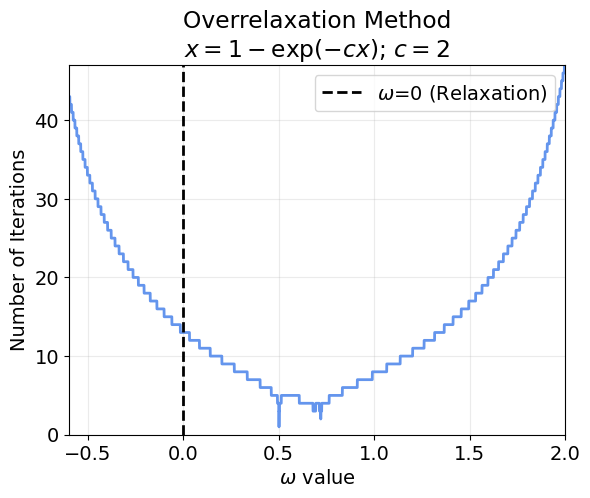

In [440]:
plt.rcParams.update({'font.size': 14})
warr = np.linspace(-0.6,2,100000)
plt.plot(warr,over_relax(fxn,1,2,warr,1e-6)[1],linewidth=2,color="cornflowerblue")
#plt.plot(warr,updated_relax(fxn,1,2,warr,1e-6)[1])


#plt.plot(carr,relax(fxn,1,carr,1e-6),linewidth=2,color="cornflowerblue")
plt.axvline(0,color='k',linewidth=2,linestyle='--', label="$\omega$=0 (Relaxation)")


plt.title("Overrelaxation Method\n$x=1-\exp(-cx)$; $c=2$")
plt.legend()
plt.ylabel("Number of Iterations")
plt.xlabel("$\omega$ value")

plt.ylim(0,47)
plt.xlim(-0.6,2)
plt.grid(which='both',alpha=0.25)
plt.savefig("OverRelaxation_method.png", dpi=300, bbox_inches='tight')
plt.show()

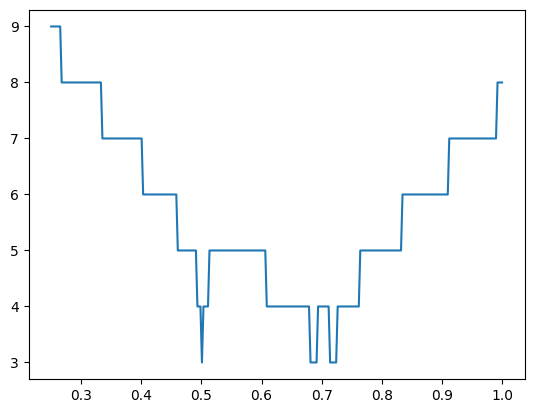

In [192]:
warr = np.linspace(0.25,1,300)
plt.plot(warr,over_relax(fxn,1,2,warr,1e-6)[1])

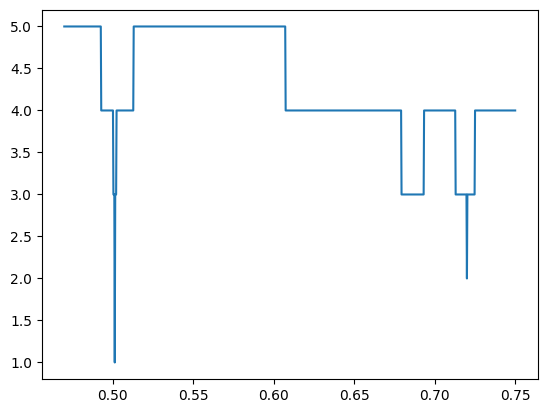

In [153]:
warr = np.linspace(0.47,0.75,1001)
plt.plot(warr,over_relax(fxn,1,2,warr,1e-6)[1])

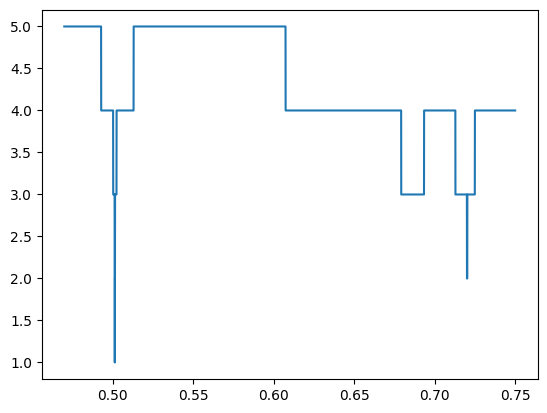

In [155]:
warr = np.linspace(0.47,0.75,100001)
plt.plot(warr,over_relax(fxn,1,2,warr,1e-6)[1])

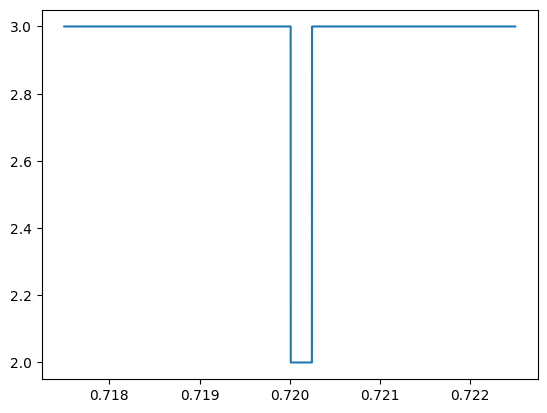

In [158]:
warr = np.linspace(0.7175,0.7225,100001)
plt.plot(warr,over_relax(fxn,1,2,warr,1e-6)[1])

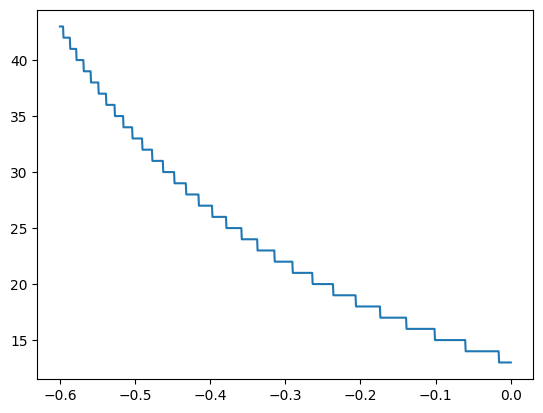

In [184]:
warr = -np.linspace(1e-64,0.6,1000)
plt.plot(warr,over_relax(fxn,1,2,warr,1e-6)[1])

In [165]:
over_relax(fxn,1,2,[-0.02],1e-6)[1]

[14]

---

## Exercise 6.13: Wien's displacement constant

Planck's radiation law tells us that the intensity of radiation per unit area and per unit wavelength $\lambda$ from a black body at temperature $T$ is
$$I(\lambda) = \frac{2\pi hc^2\lambda^{-5}}{e^{hc/\lambda k_B T} - 1},$$
where $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

a) Show by differentiating that the wavelength $\lambda$ at which the emitted radiation is strongest is the solution of the equation
$$5 e^{-hc/\lambda k_B T} + \frac{hc}{\lambda k_B T} - 5 = 0.$$

Make the substitution $x = hc/\lambda k_B T$ and hence show that the wavelength of maximum radiation obeys the **Wien displacement law**:
$$\lambda = \frac{b}{T},$$
where the so-called **Wien displacement constant** is $b = hc/k_B x$, and $x$ is the solution to the nonlinear equation
$$5 e^{-x} + x - 5 = 0.$$

b) Write a program to solve this equation to an accuracy of $\epsilon = 10^{-6}$ using the **binary search method**, and hence find a value for the displacement constant.

c) The displacement law is the basis for the method of **optical pyrometry**, a method for measuring the temperatures of objects by observing the color of the thermal radiation they emit. The method is commonly used to estimate the surface temperatures of astronomical bodies, such as the Sun. The wavelength peak in the Sun's emitted radiation falls at $\lambda = 502\ \text{nm}$. From the equations above and your value of the displacement constant, estimate the surface temperature of the Sun.

In [19]:
def bisection(fxn, a, b):
    c = (a+b)/2
    while np.abs(fxn(c)) > 1e-6:
        c = (a+b)/2
        if fxn(a)*fxn(c) < 0:
            b = c
        else: 
            a = c
        #print(c)
    return c

In [20]:
def eq(x):
    return 5*np.exp(-x)+x-5
print(bisection(eq,-0.1,3))
print(bisection(eq,4,6))

-9.536743165024992e-08
4.965114593505859


In [102]:
(1240)/((8.617333262e-5)*502*bisection(eq,4,6) )#(eV*nm)/[(eV/K)*(nm)]

5773.189362517699

3. Attached with this assignment is a data file that contains measurements of the **galaxy stellar mass function** from the COSMOS galaxy survey. The columns are:
    1. $\log M_{\text{gal}}\ [\text{dex}]$
    2. $n(M_{\text{gal}})\ [1/\text{dex}/\text{Volume}]$
    3. $\text{error in } n(M_{\text{gal}})$

Here, "dex" means base-10 $\log$ of the stellar mass. $\text{Volume}$ here is $(\text{Mpc}/\text{h})^3$. Measurements of this type are usually described by a **"Schechter function"**, which for this problem has the form
$$n(M_{\text{gal}}) = \phi^* \left(\frac{M_{\text{gal}}}{M_*}\right)^{\alpha+1} \exp\left(-\frac{M_{\text{gal}}}{M_*}\right) \ln(10)$$

This function (which has the same units as column 2 in the datafile) has three free parameters: $\phi^*$, the amplitude, $M_*$, the "characteristic mass scale", where the function changes from being a power-law to having an exponential cutoff, and $\alpha$, the low-mass slope of the function.

Write a code that will implement the **gradient descent method** in multiple dimensions, using **numerical derivatives**, to find the minimum of a function. Test your code on a simple function, such as:
$$f(x, y) = (x - 2)^2 + (y - 2)^2$$

(Remember that we're still using numerical derivatives, even though the derivatives of this function are known). After confirming that your code works (include a plot demonstrating this result - use your discretion to choose what the plot should show), apply it to the problem of

fitting the Schechter function to the data provided. The function that you are minimizing is the $\chi^2$ of model. Verify that your result is robust by demonstrating that you get the same result when starting from distinct locations in parameter space (within reason). Attach the following plots:

a) $\chi^2$ as a function of step $i$.

b) a comparison of your best-fit Schechter function to the data, on a log-log plot.

If you want to attach more plots to help you explain your results, feel free to do so.

In [192]:
df = pd.read_csv("/home/xavier/Downloads/smf_cosmos.dat", sep='\s+', header=None)
log = np.array(df[0])
n = np.array(df[1])
serr = np.array(df[2])

In [39]:
np.arange(1,len([1,2,3])+1,1)

array([1, 2, 3])

In [308]:
def grad(fxn,h,*args):
    argarr = np.array(args,dtype=float)
    result = np.zeros_like(argarr)
    
    for i in range(len(args)):
        harr = np.zeros_like(argarr)
        harr[i] = h
        result[i] = (fxn(*argarr)-fxn(*(argarr-harr)))/h
    return result
def descent(fxn, step_size, max_iterations, *init_args):
    argarr = np.array(init_args,dtype=float)
    #print(argarr)
    iterationarr = []
    for i in range(max_iterations):
        fargarr = fxn(*argarr)
        iterationarr.append((argarr,fargarr))
        gradient = grad(fxn,1e-6,*argarr)
        argarr = argarr - step_size*gradient
        if np.abs(fxn(*argarr)-fargarr)< 1e-6:
            iterationarr.append((argarr,fxn(*argarr)))
            return argarr, iterationarr
    return argarr, iterationarr
            
        

In [309]:
def sfxn(*args):
    x, y = args
    return (x-2)**2+(y-2)**2

In [320]:
grad(sfxn,1e-6,1.,1.)

array([-2.000001, -2.000001])

In [316]:
descent(sfxn,0.1,100,1,1)

(array([1.99920822, 1.99920822]),
 [(array([1., 1.]), np.float64(2.0)),
  (array([1.2000001, 1.2000001]), np.float64(1.2799996798821138)),
  (array([1.36000018, 1.36000018]), np.float64(0.8191995391439669)),
  (array([1.48800024, 1.48800024]), np.float64(0.5242875002813484)),
  (array([1.5904003, 1.5904003]), np.float64(0.3355438363671046)),
  (array([1.67232034, 1.67232034]), np.float64(0.21474792421151953)),
  (array([1.73785637, 1.73785637]), np.float64(0.13743856664233828)),
  (array([1.7902852, 1.7902852]), np.float64(0.0879605987687051)),
  (array([1.83222826, 1.83222826]), np.float64(0.05629471610572162)),
  (array([1.8657827, 1.8657827]), np.float64(0.036028564622400096)),
  (array([1.89262626, 1.89262626]), np.float64(0.023058238409626224)),
  (array([1.91410111, 1.91410111]), np.float64(0.014757238223085865)),
  (array([1.93128099, 1.93128099]), np.float64(0.009444604975541495)),
  (array([1.94502489, 1.94502489]), np.float64(0.006044525194527127)),
  (array([1.95602001, 1.95

In [317]:
final_args, iterations = descent(sfxn,0.1,100,1,1)

In [318]:
final_args

array([1.99920822, 1.99920822])

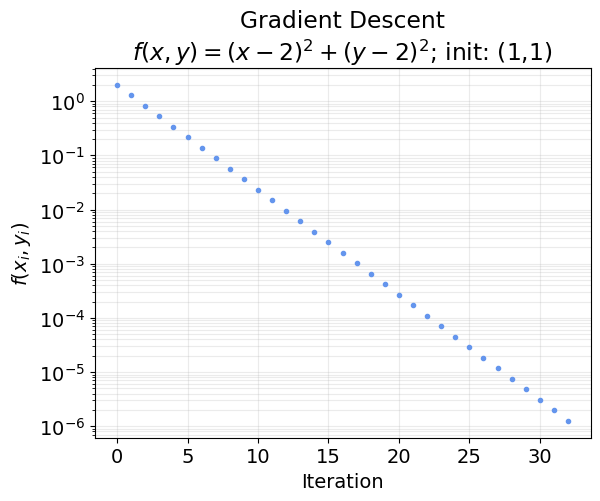

In [325]:
plt.semilogy([i[1] for i in iterations],color="cornflowerblue",linewidth=2,marker='.',linestyle='')

plt.title("Gradient Descent\n$f(x,y)=(x-2)^2+(y-2)^2$; init: (1,1)")
#plt.legend()
plt.ylabel("$f(x_i,y_i)$")
plt.xlabel("Iteration")

#plt.ylim(0,47)
#plt.xlim(-0.6,2)
plt.grid(which='both',alpha=0.25)
plt.savefig("simple_gradDescent.png", dpi=300, bbox_inches='tight')
plt.show()



In [428]:
log = np.array(df[0])
n = np.array(df[1])
serr = np.array(df[2])
def schechter(M, phi, Mstar, alpha):
    return phi*np.power(M/Mstar, alpha+1)*np.exp(-M/Mstar)*np.log(10)
def schechter_log(logMgal, logphi, logMstar, alpha):
    M = 10**logMgal
    Mstar = 10**logMstar
    phi = 10**logphi
    return phi*(M/Mstar)**(alpha+1)*np.exp(-M/Mstar)*np.log(10)
def chi2(logMgal=log, observed=n, err=err, *args):
    logphi, logMstar, alpha = args
    calculated = schechter_log(logMgal, logphi, logMstar, alpha)
    return np.sum(((observed - calculated) / err)**2)
# log = np.array(df[0])
# n = np.array(df[1])
# serr = np.array(df[2])
def schi2(*args):
    logMgal=log
    observed=n
    err=serr
    logphi, logMstar, alpha = args
    calculated = schechter_log(logMgal, logphi, logMstar, alpha)
    return np.sum(((observed - calculated) / err)**2)


final_args, iterations = descent(schi2,1e-5, int(2e2), -3,11.2,-0.5)

In [429]:
logphi, logMstar, alpha = final_args
schi2_vals = [i[1] for i in iterations]

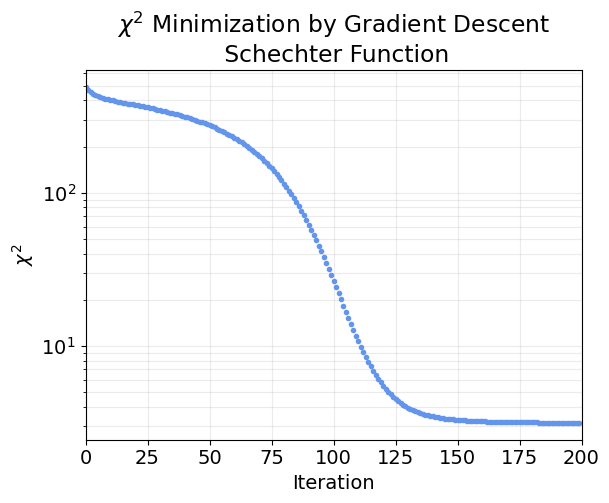

In [436]:
plt.semilogy(schi2_vals, 
             marker='.',linestyle='',color="cornflowerblue",linewidth=2)

plt.title("$\chi^2$ Minimization by Gradient Descent\n Schechter Function")
#plt.legend()
plt.ylabel("$\chi^2$")
plt.xlabel("Iteration")

#plt.ylim(0,47)
plt.xlim(0,200)
plt.grid(which='both',alpha=0.25)
plt.savefig("x2Descent.png", dpi=300, bbox_inches='tight')
plt.show()

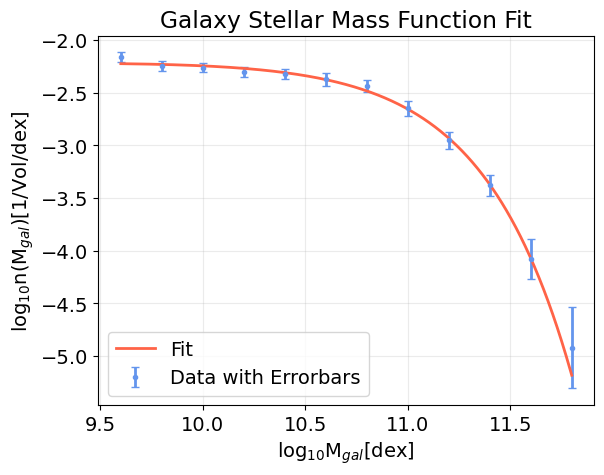

In [441]:
plt.errorbar(log, np.log10(n),
             yerr=(1/(np.log(10)*n))*err,
             marker='.',linestyle='', label="Data with Errorbars",color="cornflowerblue",capsize=3,linewidth=2)

plt.plot(np.linspace(min(log),max(log),10000), 
         np.log10(schechter_log(np.linspace(min(log),max(log),10000), *final_args)), label="Fit",color="tomato",linewidth=2)
plt.title("Galaxy Stellar Mass Function Fit")
plt.legend()
plt.ylabel("log$_{10}$n(M$_{gal}$)[1/Vol/dex]")
plt.xlabel("log$_{10}$M$_{gal}$[dex]")

#plt.ylim(0,47)
#plt.xlim(0,200)
plt.grid(which='both',alpha=0.25)
plt.savefig("gsmffit.png", dpi=300, bbox_inches='tight')
plt.show()